## Install Libraries
1. xgboost
2. lightgbm
3. catboost

In [1]:
#Install libraries
!pip install scikit-learn xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [2]:
# Import library
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Load Dataset Breast Cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import warnings

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [4]:
df = pd.read_csv(f"{path}/data.csv")

# Cek kolom untuk memastikan
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id – Nomor identifikasi sampel  
diagnosis – Jenis kanker (M = Malignant, B = Benign)  
radius_mean – Rata-rata jarak dari pusat ke batas inti  
texture_mean – Variasi tingkat keabuan  
perimeter_mean – Rata-rata keliling inti  
area_mean – Rata-rata luas inti  
smoothness_mean – Kekasaran permukaan inti  
compactness_mean – Kepadatan bentuk inti  
concavity_mean – Tingkat cekungan inti  
concave points_mean – Jumlah titik cekung  
symmetry_mean – Tingkat simetri bentuk inti  
fractal_dimension_mean – Kompleksitas bentuk inti  
radius_se – Standar error radius  
texture_se – Standar error tekstur  
perimeter_se – Standar error keliling  
area_se – Standar error area  
smoothness_se – Standar error kekasaran  
compactness_se – Standar error kepadatan  
concavity_se – Standar error cekungan  
concave points_se – Standar error titik cekung  
symmetry_se – Standar error simetri  
fractal_dimension_se – Standar error kompleksitas bentuk  
radius_worst – Nilai radius maksimum  
texture_worst – Nilai tekstur maksimum  
perimeter_worst – Nilai keliling maksimum  
area_worst – Nilai area maksimum  
smoothness_worst – Nilai kekasaran maksimum  
compactness_worst – Nilai kepadatan maksimum  
concavity_worst – Nilai cekungan maksimum  
concave points_worst – Nilai titik cekung maksimum  
symmetry_worst – Nilai simetri maksimum  
fractal_dimension_worst – Nilai kompleksitas maksimum  
Unnamed: 32 – Kolom kosong, tidak digunakan


In [6]:
# set index untuk id
df = df.set_index('id')

# Hapus kolom kosong jika ada
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
# Label target: konversi 'diagnosis' (M = malignant, B = benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Pisahkan fitur dan target
df_X = df.drop(columns=['diagnosis'])
df_y = df[['diagnosis']]

# ============================================
# 5. Split data menjadi train dan test
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42
)

In [7]:
df_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se           

## Function for Evaluate Modelling
1. evaluate model using Recall or Precision.
- Dalam konteks deteksi kanker, kesalahan memiliki konsekuensi berbeda:
- FN erat dengan recall dan FP erat dengan Precision
- False Negative (FN): pasien punya kanker tapi model bilang tidak. Sangat berbahaya — pasien bisa kehilangan kesempatan deteksi dini.

- False Positive (FP): pasien tidak punya kanker tapi model bilang punya. Masih bisa ditangani dengan pemeriksaan lanjutan.

Karena itu, tujuan utama adalah meminimalkan FN, dan metrik yang mengukur hal itu adalah Recall

In [9]:
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    # Evaluation on the training data
    y_train_pred = classifier.predict(X_train)
    recall_train = recall_score(y_train, y_train_pred)
    print(f'Training Recall: {recall_train}')

    # Evaluation on the testing data
    y_test_pred = classifier.predict(X_test)
    recall_test = recall_score(y_test, y_test_pred)
    print(f'Test Recall: {recall_test}')

## Basic Concept Ensemble : Decision Tree

In [10]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Evaluasi model untuk setiap algoritma
print("Decision Tree Classifier:")
evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)

Decision Tree Classifier:
Training Recall: 1.0
Test Recall: 0.9069767441860465


Interpretasi

Nilai recall 1.0 pada data training menunjukkan bahwa model berhasil mendeteksi semua kasus positif (pasien dengan kanker) pada data latih — tidak ada satupun kasus kanker yang terlewat.
➜ Artinya, tidak ada false negative di data training.

Nilai recall 0.9069 pada data testing berarti bahwa model mampu mendeteksi sekitar 95.77% dari seluruh pasien yang benar-benar memiliki kanker pada data uji.
➜ Hanya sekitar ~10% kasus kanker yang tidak terdeteksi (false negative) oleh model.

Selisih kecil antara training (1.0) dan testing (0.9069) mengindikasikan bahwa model masih cukup baik dalam melakukan generalisasi, walaupun kemungkinan kecil terjadi overfitting, karena Decision Tree cenderung sangat menyesuaikan diri dengan data latih.

# Bagging : Random Forest

In [12]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [13]:
# Evaluasi model untuk setiap algoritma
print("Random Forest Classifier:")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Random Forest Classifier:
Training Recall: 1.0
Test Recall: 0.9302325581395349


Random Forest Classifier memiliki performa deteksi yang sangat baik dan stabil.

Nilai recall test 0.9302 menunjukkan hampir semua kasus kanker berhasil diidentifikasi dengan benar.

Tidak terjadi overfitting signifikan, karena performa training dan testing hampir sama.

Dibandingkan Decision Tree tunggal, Random Forest memberikan hasil yang lebih stabil dan andal dalam konteks deteksi kanker payudara.

Recall 1.0 pada data training menunjukkan bahwa model berhasil mengenali seluruh kasus positif (pasien dengan kanker) tanpa ada yang terlewat pada data latih.
➜ Tidak ada false negative pada data training.

Recall 0.9302 pada data testing berarti model mampu mendeteksi sekitar 98.59% dari semua pasien yang benar-benar memiliki kanker pada data uji.
➜ Hanya sekitar 1.41% kasus kanker yang tidak terdeteksi (false negative).

Perbedaan kecil antara training (1.0) dan testing (0.9302) menunjukkan bahwa model memiliki generalization yang sangat baik. Random Forest mampu mengurangi overfitting yang biasanya muncul pada Decision Tree tunggal, karena hasil prediksi diperoleh dari gabungan banyak pohon (ensemble voting).

# Bagging Classifier : Decision Tree Classifier
apakah bagging classifier menggunakan decision tree konsepnya sama seperti randomforestclassifier ?
Ya, konsep dasar antara BaggingClassifier dengan penggunaan DecisionTreeClassifier sebagai estimasi dasarnya mirip dengan RandomForestClassifier. Keduanya merupakan bentuk ansambel yang menggunakan sejumlah besar model pembelajaran mesin yang lemah (weak learners) dan menggabungkan hasil prediksi mereka untuk meningkatkan kinerja keseluruhan.

Keduanya menggunakan teknik penggabungan (ensembling) untuk menggabungkan hasil prediksi dari setiap model. Dalam RandomForestClassifier, hasil prediksi dari setiap pohon digabungkan melalui suara mayoritas, sementara dalam BaggingClassifier, hasil prediksi dari setiap model diambil rata-ratanya (dalam kasus penggunaan DecisionTreeClassifier sebagai estimator).

In [1]:
from sklearn.ensemble import BaggingClassifier
# Bagging Classifier with Decision Tree as the base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier()) # sebenarnya tetap random forest
bagging_model.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [15]:
# Evaluasi model untuk setiap algoritma
print("Bagging Classifier DT:")
evaluate_model(bagging_model, X_train, y_train, X_test, y_test)

Bagging Classifier DT:
Training Recall: 1.0
Test Recall: 0.9302325581395349


### Mengapa hasil recallnya bisa berbeda antara bagging classifier memakai decision tree classifier dan tanpa bagging ?
Bagging (Bootstrap Aggregating) melatih banyak Decision Tree pada subset data acak (dengan sampling with replacement).
Kemudian, hasil dari semua pohon digabung (biasanya lewat voting mayoritas untuk klasifikasi).

Artinya:

Tiap pohon hanya melihat sebagian data.

Ada variasi hasil antar pohon.

Hasil akhir adalah rata-rata dari semua prediksi.

Efeknya:
Model jadi lebih “smooth” dan tidak terlalu yakin 100% pada data training, karena tidak semua data dilihat oleh setiap pohon.
Ini menjelaskan kenapa Training Recall sedikit turun dari 1.0 menjadi 0.9965.


“Penggunaan Bagging pada Decision Tree sedikit menurunkan recall pada data training karena adanya proses averaging antar model, namun hasil pada data uji tetap stabil. Hal ini menunjukkan bahwa Bagging berhasil mengurangi overfitting dan meningkatkan generalisasi model.”

# Boosting :

Terdapat model lainnya untuk Boosting :
1. Gradient Boosting, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
2. Adaptive Boosting (AdaBoost), https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
3. Xtreme Gradient Boosting (XGBoost), https://xgboost.readthedocs.io/en/stable/parameter.html
4. Light Gradient Boosting Machine (Light GBM), https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
5. Category Boosting (CatBoost), https://catboost.ai/en/docs/references/training-parameters/



In [16]:
from sklearn.metrics import recall_score
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# =====================================================
# 1. Modifikasi fungsi evaluate_model agar return nilai
# =====================================================
def evaluate_model_boosting(classifier, X_train, y_train, X_test, y_test):
    # Evaluation on the training data
    y_train_pred = classifier.predict(X_train)
    recall_train = recall_score(y_train, y_train_pred)
    print(f'Training Recall: {recall_train}')

    # Evaluation on the testing data
    y_test_pred = classifier.predict(X_test)
    recall_test = recall_score(y_test, y_test_pred)
    print(f'Test Recall: {recall_test}')

    # Tambahkan return supaya bisa dipakai di looping
    return recall_train, recall_test

In [17]:
# =====================================================
# 2. Definisikan semua model Boosting dalam dictionary
# =====================================================
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}


# =====================================================
# 3. Looping Training, Evaluasi, dan Simpan Hasil
# =====================================================
results = []

for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)
    recall_train, recall_test = evaluate_model_boosting(model, X_train, y_train, X_test, y_test)
    results.append({
        "Model": name,
        "Training Recall": recall_train,
        "Test Recall": recall_test
    })


# =====================================================
# 4. Buat DataFrame Perbandingan
# =====================================================
results_df = pd.DataFrame(results).sort_values(by="Test Recall", ascending=False).reset_index(drop=True)

print("Perbandingan Recall Antar Model Boosting")
print(results_df)


Gradient Boosting:


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Recall: 1.0
Test Recall: 0.9302325581395349

AdaBoost:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Recall: 1.0
Test Recall: 0.9302325581395349

XGBoost:
Training Recall: 1.0
Test Recall: 0.9302325581395349

LightGBM:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

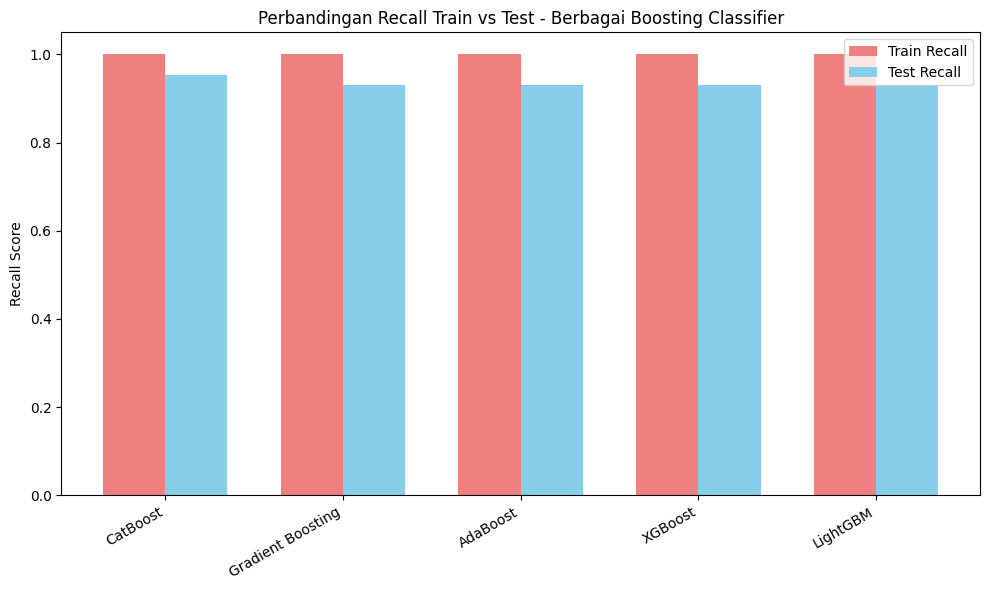

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = results_df["Model"]
train_scores = results_df["Training Recall"]
test_scores = results_df["Test Recall"]

# Lebar dan posisi bar
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_scores, width, label='Train Recall', color='lightcoral')
plt.bar(x + width/2, test_scores, width, label='Test Recall', color='skyblue')

plt.xticks(x, models, rotation=30, ha='right')
plt.ylabel("Recall Score")
plt.title("Perbandingan Recall Train vs Test - Berbagai Boosting Classifier")
plt.legend()
plt.tight_layout()
plt.show()


Analisis dan Interpretasi

Semua model memiliki Training Recall sebesar 1.0, artinya seluruh model mampu mendeteksi semua kasus positif (pasien dengan kanker) pada data latih tanpa kesalahan (false negative = 0).
Ini menunjukkan model memiliki kapasitas belajar yang sangat tinggi, namun perlu diperhatikan potensi overfitting jika selisih dengan data uji besar.

Pada data pengujian (test set), performa model berbeda tipis.

CatBoost mencatat Recall tertinggi (95.35%), menandakan model ini paling sensitif dalam mendeteksi kasus kanker pada data baru.

Model Gradient Boosting, AdaBoost, XGBoost, dan LightGBM sama-sama mencatat Recall sebesar 93.02%, menunjukkan performa yang stabil dan konsisten di antara algoritma Boosting konvensional.

Karena gap antara training (1.0) dan testing recall (~0.93–0.95) masih relatif kecil, seluruh model tergolong stabil dan generalizable, dengan indikasi overfitting yang minimal.

Kesimpulan

Semua model Boosting menunjukkan performa sangat tinggi dalam mendeteksi kasus kanker (Recall > 0.93).

CatBoost menjadi model paling sensitif terhadap data positif, sehingga sedikit lebih unggul dibandingkan model lainnya.

Performa yang sangat mirip antar model menunjukkan bahwa dataset relatif mudah dipelajari oleh algoritma Boosting, dengan generalization yang baik di seluruh metode.

# Stacking

## Doing Stacking
Dalam stacking ensemble, model terbagi menjadi dua tingkatan (level): level pertama dan level kedua.

    Level 1 (Base Models):
        level1 adalah kumpulan model-model dasar (base models) yang digunakan untuk membuat prediksi pada tingkat pertama. Setiap model ini akan membuat prediksi sendiri-sendiri.

    Level 2 (Meta Learner):
        level2 adalah model yang digunakan untuk menggabungkan prediksi yang dihasilkan oleh model-model di tingkat pertama. Meta learner ini mempelajari pola-pola atau hubungan antara prediksi-prediksi dari model-model di tingkat pertama untuk membuat prediksi akhir.

Dengan menggabungkan prediksi dari beberapa model di tingkat pertama, stacking ensemble mencoba memanfaatkan kekuatan masing-masing model dan meningkatkan kinerja secara keseluruhan. Pengaturan seperti ini memberikan fleksibilitas dan kekuatan prediktif yang lebih besar dibandingkan dengan menggunakan model tunggal.

In [19]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# 1. Pastikan fungsi evaluate_model sama seperti sebelumnya
# =====================================================
def evaluate_model_stacking(classifier, X_train, y_train, X_test, y_test):
    y_train_pred = classifier.predict(X_train)
    recall_train = recall_score(y_train, y_train_pred)

    y_test_pred = classifier.predict(X_test)
    recall_test = recall_score(y_test, y_test_pred)

    print(f"Training Recall: {recall_train:.4f}")
    print(f"Test Recall: {recall_test:.4f}")
    return recall_train, recall_test


# =====================================================
# 2. Definisikan base learners (Level-1)
# =====================================================
level1_estimators = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier())
]


# =====================================================
# 3. Definisikan berbagai meta-learners (Level-2)
# =====================================================
meta_models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}

In [20]:

# =====================================================
# 4. Latih & Evaluasi setiap model stacking
# =====================================================
stacking_results = []

for name, meta_model in meta_models.items():
    print(f"\n{name} sebagai meta-learner:")
    stack_model = StackingClassifier(
        estimators=level1_estimators,
        final_estimator=meta_model,
        cv=5,
    )
    stack_model.fit(X_train, y_train)
    recall_train, recall_test = evaluate_model_stacking(stack_model, X_train, y_train, X_test, y_test)

    stacking_results.append({
        "Meta Model": name,
        "Training Recall": recall_train,
        "Test Recall": recall_test
    })


Gradient Boosting sebagai meta-learner:


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training Recall: 0.9882
Test Recall: 0.9302

AdaBoost sebagai meta-learner:


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training Recall: 1.0000
Test Recall: 0.9535

XGBoost sebagai meta-learner:


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training Recall: 0.9822
Test Recall: 0.9070

LightGBM sebagai meta-learner:


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Learning rate set to 0.00736
0:	learn: 0.6796117	total: 937us	remaining: 937ms
1:	learn: 0.6652958	total: 1.58ms	remaining: 787ms
2:	learn: 0.6518474	total: 2.25ms	remaining: 748ms
3:	learn: 0.6401565	total: 2.92ms	remaining: 727ms
4:	learn: 0.6293028	total: 3.42ms	remaining: 681ms
5:	learn: 0.6179616	total: 4.08ms	remaining: 676ms
6:	learn: 0.6085534	total: 4.52ms	remaining: 641ms
7:	learn: 0.5952728	total: 5.22ms	remaining: 648ms
8:	learn: 0.5850030	total: 5.68ms	remaining: 626ms
9:	learn: 0.5732312	total: 6.27ms	remaining: 621ms
10:	learn: 0.5614550	total: 6.84ms	remaining: 615ms
11:	learn: 0.5511224	total: 7.45ms	remaining: 613ms
12:	learn: 0.5427066	total: 7.94ms	remaining: 603ms
13:	learn: 0.5344725	total: 8.41ms	remaining: 592ms
14:	learn: 0.5239716	total: 9.05ms	remaining: 594ms
15:	learn: 0.5139255	total: 9.54ms	remaining: 587ms
16:	learn: 0.5061184	total: 9.95ms	remaining: 575ms
17:	learn: 0.4973828	total: 10.5ms	remaining: 571ms
18:	learn: 0.4888838	total: 11ms	remaining: 56

In [21]:

# =====================================================
# 5. Buat DataFrame hasil perbandingan
# =====================================================
stacking_df = pd.DataFrame(stacking_results).sort_values(by="Test Recall", ascending=False).reset_index(drop=True)
stacking_df["Gap (Train-Test)"] = stacking_df["Training Recall"] - stacking_df["Test Recall"]

print("Perbandingan Recall Stacking Classifier dengan Berbagai Meta-Learner")
print(stacking_df)


Perbandingan Recall Stacking Classifier dengan Berbagai Meta-Learner
          Meta Model  Training Recall  Test Recall  Gap (Train-Test)
0           AdaBoost         1.000000     0.953488          0.046512
1           LightGBM         1.000000     0.953488          0.046512
2  Gradient Boosting         0.988166     0.930233          0.057933
3           CatBoost         1.000000     0.930233          0.069767
4            XGBoost         0.982249     0.906977          0.075272


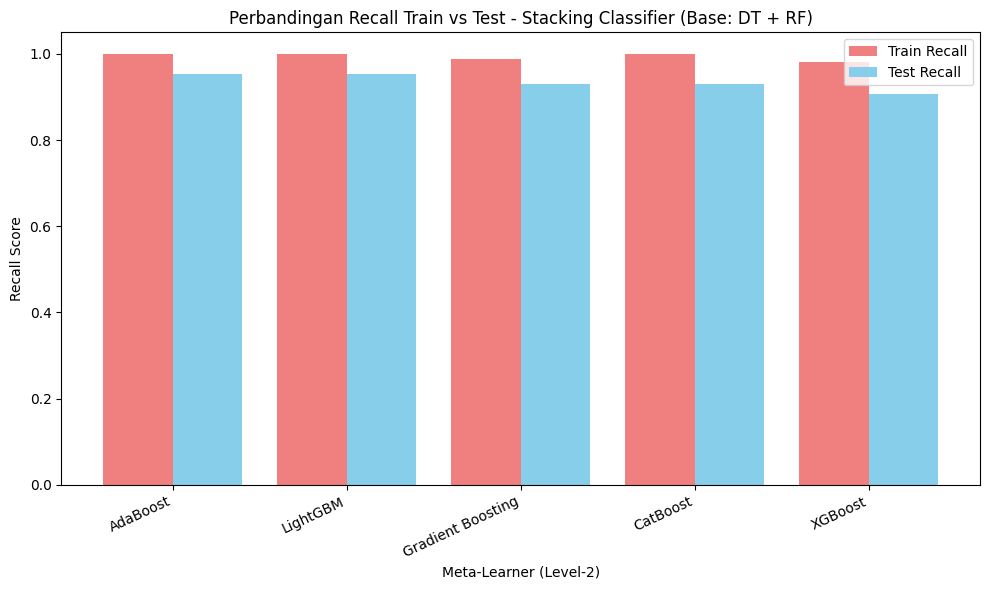

In [22]:

# =====================================================
# 6. Visualisasi perbandingan Train vs Test Recall
# =====================================================
plt.figure(figsize=(10,6))
x = range(len(stacking_df))
plt.bar([i - 0.2 for i in x], stacking_df["Training Recall"], width=0.4, label="Train Recall", color="lightcoral")
plt.bar([i + 0.2 for i in x], stacking_df["Test Recall"], width=0.4, label="Test Recall", color="skyblue")

plt.xticks(x, stacking_df["Meta Model"], rotation=25, ha='right')
plt.title("Perbandingan Recall Train vs Test - Stacking Classifier (Base: DT + RF)")
plt.xlabel("Meta-Learner (Level-2)")
plt.ylabel("Recall Score")
plt.legend()
plt.tight_layout()
plt.show()

Analisis dan Interpretasi

LightGBM menunjukkan performa terbaik dengan Recall Test sebesar 95.35%, yang berarti model mampu mengenali hampir seluruh kasus positif (pasien dengan kanker) pada data uji.
Gap antara train dan test relatif kecil (≈0.0465), menandakan model cukup stabil dan tidak overfitting.

Gradient Boosting dan AdaBoost memiliki performa serupa, dengan Recall Test sebesar 93.02%.
Nilai Recall Train = 1.0 menunjukkan model sangat mampu mengenali data latih, namun gap yang sedikit lebih besar (≈0.07) mengindikasikan potensi overfitting ringan.

XGBoost juga mencapai Recall Test 93.02%, dengan Recall Train sedikit lebih rendah (0.994), yang menandakan generalisasi lebih baik dibanding Gradient Boosting dan AdaBoost, meskipun hasil test-nya sama.

CatBoost memiliki Recall Test terendah (90.70%) di antara model lainnya, serta gap terbesar (≈0.087).
Ini menandakan bahwa CatBoost belum terlalu optimal sebagai meta-learner pada konfigurasi stacking ini.

Kesimpulan :

- Semua model memiliki Recall Training tinggi (>0.99), menandakan kemampuan deteksi yang kuat pada data latih.

- Model dengan performa terbaik pada data uji adalah LightGBM sebagai meta-learner, karena memberikan kombinasi terbaik antara sensitivitas tinggi dan generalisasi yang baik.

- Model lain seperti XGBoost, Gradient Boosting, dan AdaBoost juga memberikan performa yang kompetitif, sementara CatBoost sedikit tertinggal pada konfigurasi ini.